# Hyperparameter Optimization (RF)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pprint

### Create some random data for classification

In [26]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, 
    n_features=4, #100
    n_informative=2,#2 
    n_redundant= 2,#96
    n_clusters_per_class=2,#2
    n_classes=2,
    random_state=57)

In [27]:
pd.Series(y).value_counts()

0    502
1    498
dtype: int64

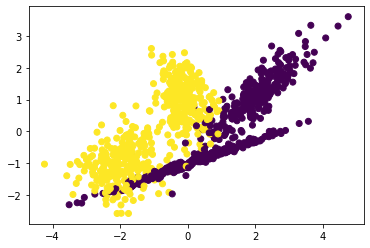

In [28]:
fig, ax = plt.subplots(1)
ax.scatter(X[:,0], X[:, 1], c=y)

#### Try a few different versions of the figure to see which features might be the informative ones.

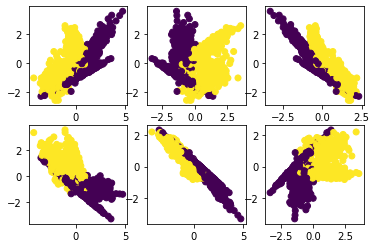

In [29]:
fig, ax = plt.subplots(2,3)
(ax1, ax2,ax3), (ax4,ax5,ax6) = ax
ax1.scatter(X[:,0], X[:, 1], c=y)
ax2.scatter(X[:,2], X[:, 1], c=y)
ax3.scatter(X[:,3], X[:, 1], c=y)
ax4.scatter(X[:,0], X[:, 2], c=y)
ax5.scatter(X[:,0], X[:, 3], c=y)
ax6.scatter(X[:,2], X[:, 3], c=y)

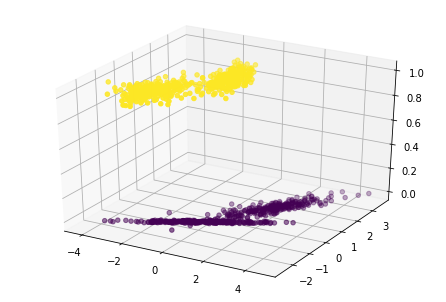

In [30]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()

ax = Axes3D(fig) #<-- Note the difference from your original code...

ax.scatter(X[:,0], X[:,1], y,c=y,marker='o')
plt.show()

### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Define some classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Define a parameter grid for CV

In [33]:
param_grid = {
    'max_depth': [1, 4],#, 8, 32, 128, None],
    'n_estimators': [1, 10]#, 100, 1000, 1000]
}
param_grid

{'max_depth': [1, 4], 'n_estimators': [1, 10]}

### Run the grid search

Let's do our validation with a grid search over the hyperparameter values and find best ones.

##### For the scoring we use the F1 score from sklearn.metrics. It's aiming to optimise the precision and recall. 

- F1 = 2 * (precision * recall) / (precision + recall)
- Precision: Not to have FP
- Recall: To find as many TP as possible

n_jobs is number of jobs run in parallel.


In [34]:
cv = GridSearchCV(clf, param_grid, 
                  return_train_score=True, 
                  scoring='f1', 
                  cv=5, n_jobs=4)

# Gridsearch inherits the methods from the classifier you fit, predict, 
# proba etc. can be used.
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

### Collect the results

In [36]:
dsplay(res)

NameError: name 'dsplay' is not defined

In [38]:
res = pd.DataFrame(cv.cv_results_)
print(res.columns)
pprint.pprint(res)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002601      0.000491         0.002001    6.310549e-04   
1       0.011201      0.001470         0.001800    7.492206e-04   
2       0.001401      0.000490         0.001000    2.780415e-07   
3       0.009400      0.000490         0.001800    4.005194e-04   

  param_max_depth param_n_estimators                                params  \
0               1                  1   {'max_depth': 1, 'n_estimators': 1}   
1    

In [39]:
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [41]:
c = ['param_max_depth', 'param_n_estimators', 'mean_test_score', 'mean_train_score']
res.sort_values('mean_test_score')[c]

,param_max_depth,param_n_estimators,mean_test_score,mean_train_score
0,1,1,0.848159,0.857103
1,1,10,0.908554,0.917690
2,4,1,0.921907,0.935225
3,4,10,0.944249,0.964740


In [145]:
#c = ['param_max_depth', 'param_n_estimators', 'mean_test_score', 'mean_train_score']
#res.sort_values('mean_test_score')[c]

##### Looking at the fitting time, fitting 10 trees doesn't scale 10 folds with fitting 
https://www.quora.com/What-is-the-time-complexity-of-a-Random-Forest-both-building-the-model-and-classification

In [43]:
 res_pivot = res.pivot(
     index = 'param_max_depth',
     columns = 'param_n_estimators',
     values = 'mean_fit_time')
 res_pivot

param_n_estimators,1,10
param_max_depth,,
1,0.002601,0.011201
4,0.001401,0.009400


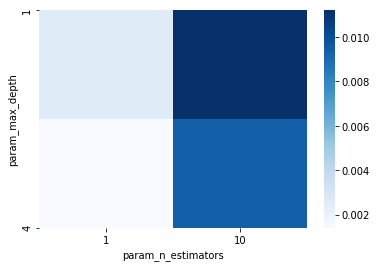

In [44]:
import seaborn as sns
sns.heatmap(res_pivot, cmap='Blues')

### Make a final prediction on the left-out test set

In [46]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
pred = cv.predict(X_test)
f1_score(y_test, pred)

0.9311740890688259

In [154]:
# Time to run it on the larger data.

In [68]:
# param_grid = {
#     'max_depth': np.logspace(0, 3, 4, dtype=int),
#     'n_estimators': np.logspace(0, 3, 4, dtype=int)
# }
# param_grid